# Generative AI

__Lesson Objectives__
By the end of this lesson, you will be able to:

* Identify industry applications, trends, and opportunities of Generative AI
* Contextualize Generative AI within the broader history and landscape of machine learning and artificial intelligence
* Describe the general process that popular Generative AI models use to generate outputs

  Generative AI is an exciting field of artificial intelligence that opens the door to creating new and original content, spanning from written text to stunning visuals and even computer-generated music. It showcases the innovative side of AI by going beyond simple analytical tasks to engage in creative processes.

  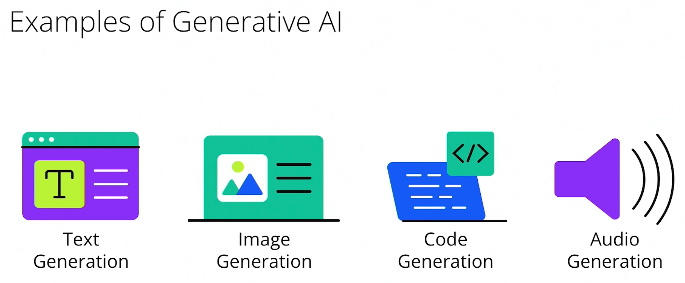


__Technical Terms Explained:__

* `Text Generation:` This involves making computers write text that makes sense and is relevant to the topic, akin to an automatic storyteller.

* `Image Generation:` This allows computers to make new pictures or change existing ones, like a digital artist using a virtual paintbrush.

* `Code Generation:` This is Gen AI for programming, where the computer helps write new code.

* `Audio Generation:` Computers can also create sounds or music, a bit like a robot composer coming up with its own tunes.

* `Chat GPT:` A language model developed by OpenAI that can generate responses similar to those a human would give in a conversation by predicting the next word in a sequence based on context.

* `DALL·E:` An AI program by OpenAI that produces images from textual descriptions, mimicking creativity in visual art.

* `GitHub Copilot:` A coding assistant tool that suggests code snippets and completes code lines to help developers write more efficiently and with fewer errors.

* `Contextual Suggestions:` Recommendations provided by AI tools, like Copilot, which are relevant to the current task or context within which a user is working.


The applications of Generative AI span a gamut of exciting fields, broadening creativity and innovation in content creation, product design, scientific inquiry, data enhancement, and personalized experiences. The power of Generative AI lies in its ability to imagine and refine with speed, offering solutions and opening doors to future inventions.

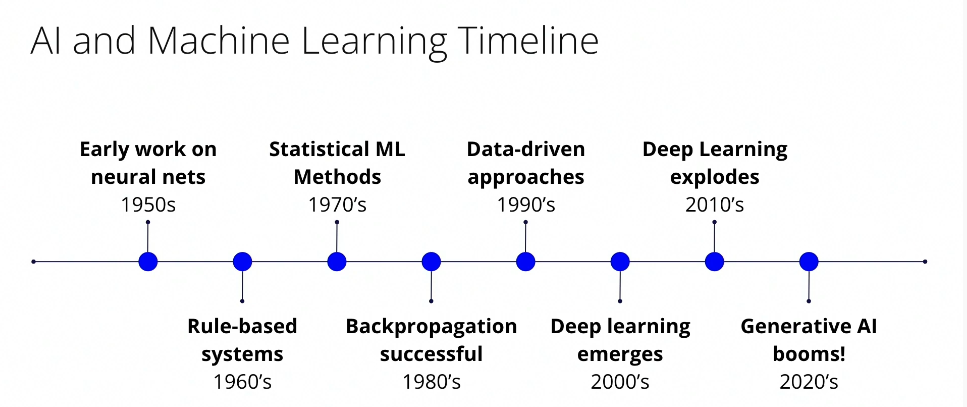

__Technical terms explained:__
`Perceptron:` An early type of neural network component that can decide whether or not an input, represented by numerical values, belongs to a specific class.

`Neural Networks:` Computer systems modeled after the human brain that can learn from data by adjusting the connections between artificial neurons.

`Back Propagation:` A method used in artificial neural networks to improve the model by adjusting the weights by calculating the gradient of the loss function.

`Statistical Machine Learning:` A method of data analysis that automates analytical model building using algorithms that learn from data without being explicitly programmed.

`Deep Learning:` A subset of machine learning composed of algorithms that permit software to train itself to perform tasks by exposing multilayered neural networks to vast amounts of data.

`Generative Adversarial Networks (GANs):` A class of machine learning models where two networks, a generator and a discriminator, are trained simultaneously in a zero-sum game framework.

`Transformer:` A type of deep learning model that handles sequential data and is particularly noted for its high performance in natural language processing tasks.


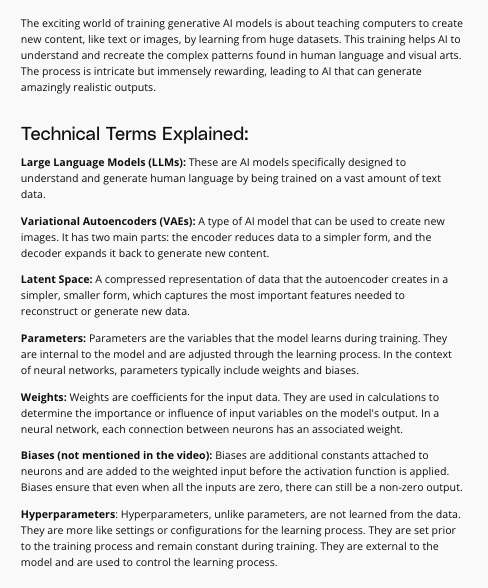


Generation algorithms are incredible tools that allow AI to create text and images that seem amazingly human-like. By understanding and applying these smart algorithms, AI can generate new content by building upon what it knows, just like filling in missing puzzle pieces.

__Technical Terms Explained:__

`Autoregressive text generation:` Autoregressive text generation is like a game where the computer guesses the next word in a sentence based on the words that came before it. It keeps doing this to make full sentences.

`Latent space decoding:` Imagine if you had a map of all the possible images you could create, with each point on the map being a different image. Latent space decoding is like picking a point on that map and bringing the image at that point to life.

`Diffusion models:` Diffusion models start with a picture that's full of random dots like TV static, and then they slowly clean it up, adding bits of the actual picture until it looks just like a real photo or painting.



# Exercise: Generating one token at a time

In this exercise, we will get to understand how an LLM generates text--one token at a time, using the previous tokens to predict the following ones.

## Step 1. Load a tokenizer and a model

First we load a tokenizer and a model from HuggingFace's transformers library. A tokenizer is a function that splits a string into a list of numbers that the model can understand.

In this exercise, all the code will be written for you. All you need to do is follow along!

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# To load a pretrained model and a tokenizer using HuggingFace, we only need two lines of code!
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# We create a partial sentence and tokenize it.
text = "Udacity is the best place to learn about generative"
inputs = tokenizer(text, return_tensors="pt")

# Show the tokens as numbers, i.e. "input_ids"
inputs["input_ids"]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tensor([[  52,   67, 4355,  318,  262, 1266, 1295,  284, 2193,  546, 1152,  876]])

## Step 2. Examine the tokenization

Let's explore what these tokens mean!

In [3]:
# Show how the sentence is tokenized
import pandas as pd


def show_tokenization(inputs):
    return pd.DataFrame(
        [(id, tokenizer.decode(id)) for id in inputs["input_ids"][0]],
        columns=["id", "token"],
    )


show_tokenization(inputs)

,id,token
0,tensor(52),U
1,tensor(67),d
2,tensor(4355),acity
3,tensor(318),is
4,tensor(262),the
5,tensor(1266),best
6,tensor(1295),place
7,tensor(284),to
8,tensor(2193),learn
9,tensor(546),about


### Subword tokenization

The interesting thing is that tokens in this case are neither just letters nor just words. Sometimes shorter words are represented by a single token, but other times a single token represents a part of a word, or even a single letter. This is called subword tokenization.

## Step 2. Calculate the probability of the next token

Now let's use PyTorch to calculate the probability of the next token given the previous ones.

In [5]:
# Calculate the probabilities for the next token for all possible choices. We show the
# top 5 choices and the corresponding words or subwords for these tokens.

import torch

with torch.no_grad():
    logits = model(**inputs).logits[:, -1, :]
    probabilities = torch.nn.functional.softmax(logits[0], dim=-1)


def show_next_token_choices(probabilities, top_n=5):
    return pd.DataFrame(
        [
            (id, tokenizer.decode(id), p.item())
            for id, p in enumerate(probabilities)
            if p.item()
        ],
        columns=["id", "token", "p"],
    ).sort_values("p", ascending=False)[:top_n]


show_next_token_choices(probabilities)

,id,token,p
8300,8300,programming,0.157592
4673,4673,learning,0.148414
4981,4981,models,0.048505
17219,17219,biology,0.046481
16113,16113,algorithms,0.027796


Interesting! The model thinks that the most likely next word is "programming", followed up closely by "learning".

In [6]:
# Obtain the token id for the most probable next token
next_token_id = torch.argmax(probabilities).item()

print(f"Next token id: {next_token_id}")
print(f"Next token: {tokenizer.decode(next_token_id)}")

Next token id: 8300
Next token:  programming


In [7]:
# We append the most likely token to the text.
text = text + tokenizer.decode(8300)
text

'Udacity is the best place to learn about generative programming'